# Исследование данных о российском кинопрокате
**Описание проекта**

Заказчик этого исследования — Министерство культуры Российской Федерации.
Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.
Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

**Введение**

Нашей задачей является выявление трендов современного Российского кинематографа, важна будет оценить насколько 
эффективно Министерство культуры Российской Федерации и Фонд кино инвестирует в кинематогроф для этого выполним следующие задачи:
1) Познакомимся с данными

2) Проверим наш датафрейм на погрешности такие как дубликаты, пропуски и так далее

3) Проведем исследовательский анализ выпуска фильмов и их сборов

4) Проведем анализ фильмов получивших гос. поддержки для выявления общих тенденций

# **Содержание:** <a id='intro'></a>
+ [**0. Описание данных**](#0)
+ [**1. Знакомства с данными**](#1)
+ [**2. Предобработка данных**](#2)
    + [2.1 Перевод столбцов к нужному типу данных](#2.1)
    + [2.2 Обработка пропусков](#2.2)
    + [2.3 Удаление явных и не явных дубликатов](#2.3)
    + [2.4 Обработка категориальных значений](#2.4)
    + [2.5 Обработка количественныех значения](#2.5)
    + [2.6 Добавление новых столбцов](#2.6)
    + [2.7 Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка](#2.7)
+ [**3. Исследовательский анализ данных**](#3)
    + [3.1 График ежегодной динамики выпуска фильмов](#3.1)
    + [3.2 Графики динамики суммы сборов](#3.2)
    + [3.3 Графифки средней и медианной  суммы сборов для каждого года](#3.3)
    + [3.4 Графики, влияния возрастного ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате](#3.4)
+ [**4. Исследовательский анализ данных фильмов с государственной поддержкой**](#4)
    + [4.1 Создание датафрейма](#4.1)
    + [4.2 Диаграмма окупаемости фильмов с гос.поддержкой](#4.2)
    + [4.3 График самых популярных жанров получивших гос.поддержку](#4.3)
    + [4.4 Средняя оценка фильмов с гос.поддержкой](#4.4)
    + [4.5 График режиссеров чаще всего получавших гос.поддержку](#4.5)
    + [4.6 График доли государственной поддержки в бюджете фильма по жанрам](#4.6)
    + [4.7 График окупаемости фильмов по возрастным ограничения](#4.7)
    + [4.8 График студий по окупаемости](#4.8)
    + [4.9 Вывод к параграфу](#4.9)
+[**5. Общий вывод**](#5)

# 0. Описание данных<a id='0'></a>


Описание данных
Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
* title — название фильма;
* puNumber — номер прокатного удостоверения;
* show_start_date — дата премьеры фильма;
* type — тип фильма;
* film_studio — студия-производитель;
* production_country — страна-производитель;
* director — режиссёр;
* producer — продюсер;
* age_restriction — возрастная категория;
* refundable_support — объём возвратных средств государственной поддержки;
* nonrefundable_support — объём невозвратных средств государственной поддержки;
* financing_source — источник государственного финансирования;
* budget — общий бюджет фильма;
* ratings — рейтинг фильма на КиноПоиске;
* genres — жанр фильма.


Обратите внимание, что столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.
Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
* puNumber — номер прокатного удостоверения;
* box_office — сборы в рублях.

# 1. Знакомства с данными<a id='1'></a>
([к содержанию](#intro))

Импортируем нужные нам библиотеки для анализа данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_certificate = pd.read_csv('/datasets/mkrf_movies.csv')
df_rental = pd.read_csv('/datasets/mkrf_shows.csv')

У нас есть две таблицы их нужно соеднить по общему столбцу puNumber. Для этого его нужно привести к одинаковому типу данных в обоих таблицах

In [3]:
df_certificate.info()
df_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Так как придеться много работать с цифрами упростим читаемость данных:

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
df_certificate.tail(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
7476,Я свободен,111023019,2019-12-26T12:00:00.000Z,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,"30,000,000.00","46,154,000.00",Министерство культуры,5.9,драма
7477,Тридцать,121038419,2019-12-26T12:00:00.000Z,Художественный,Демнехст ауф видео,Германия,Симона Костова,Джейлан Атаман-Джека,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,драма
7478,(Не)идеальный мужчина,111023119,2019-12-24T12:00:00.000Z,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+» - для детей старше 12 лет,"40,000,000.00","60,000,000.00","150,147,502.00",Фонд кино,4.5,"комедия,фантастика,мелодрама"
7479,Эколав,111023219,2019-12-26T12:00:00.000Z,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23T12:00:00.000Z,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер"
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
7485,"Машины песенки. Серия ""Когда цветут кактусы""",124010719,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",И.Трусов,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.3,"комедия,вестерн"


Найдем те значения в столбце puNumber, которые не являются числовыми и мешают нам осуществить перевод в int:

In [6]:
for i in df_certificate['puNumber']:
    if i.isdigit() == False:
        print(i)

 111004112
нет


In [7]:
display(df_certificate.query('puNumber == "нет"'))
display(df_certificate.query('puNumber == " 111004112"'))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_certificate = df_certificate[(df_certificate['puNumber'] != ' 111004112') & (df_certificate['puNumber'] != 'нет')]

In [9]:
df_certificate['puNumber'] = df_certificate['puNumber'].astype(int)

Теперь соединим две таблицы:

In [10]:
df = df_certificate.merge(df_rental, how = 'left')

Проверим как теперь выглядит наша обща таблица:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7484 entries, 0 to 7483
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7484 non-null   object 
 1   puNumber               7484 non-null   int64  
 2   show_start_date        7484 non-null   object 
 3   type                   7484 non-null   object 
 4   film_studio            7466 non-null   object 
 5   production_country     7482 non-null   object 
 6   director               7475 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7484 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [12]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Как мы видим таблицы объеденились правильно, все 3158 значений box_office из датафрейма df_rental.info() вошли в датафрейм df_certificate, а количество уникальных идентификаторов в ней не изменилось

# 2. Предобработка данных<a id='2'></a>
([к содержанию](#intro))

Посмотрим какие типы данных у нас в датафрейме:

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7484 entries, 0 to 7483
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7484 non-null   object 
 1   puNumber               7484 non-null   int64  
 2   show_start_date        7484 non-null   object 
 3   type                   7484 non-null   object 
 4   film_studio            7466 non-null   object 
 5   production_country     7482 non-null   object 
 6   director               7475 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7484 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [14]:
df.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия","2,700.00"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


**Перевод столбцов к нужному типу данных**<a id='2.1'></a>


([к содержанию](#intro))


* show_start_date - переведем в формат datetime64
* ratings - переведем в формат float

Все остальное оставим как есть.

In [15]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'],  format='%Y-%m-%dT%H:%M:%S')
df['show_start_date']

0      2015-11-27 12:00:00+00:00
1      2016-09-13 12:00:00+00:00
2      2016-10-10 12:00:00+00:00
3      2016-06-10 12:00:00+00:00
4      2015-07-29 12:00:00+00:00
                  ...           
7479   2019-12-23 12:00:00+00:00
7480   2019-12-24 12:00:00+00:00
7481   2019-12-28 12:00:00+00:00
7482   2019-12-30 12:00:00+00:00
7483   2019-12-30 12:00:00+00:00
Name: show_start_date, Length: 7484, dtype: datetime64[ns, UTC]

In [16]:
df['ratings'].value_counts()

6.6    312
6.7    308
6.8    261
7.2    252
6.2    243
      ... 
9.1      1
1.2      1
1.9      1
19%      1
89%      1
Name: ratings, Length: 94, dtype: int64

В данном столбце рейтинг записали двумя способами: в процентах и в десятичном формате. Приведем все к одному формату.

In [17]:
df['ratings'] = df['ratings'].apply(lambda a: str(a).replace('%',''))
df['ratings'] = df['ratings'].astype(float)
df['ratings'] = df['ratings'].apply(lambda x: x%10 if x>10 else x)

**Обработка пропусков**<a id='2.2'></a>

([к содержанию](#intro))

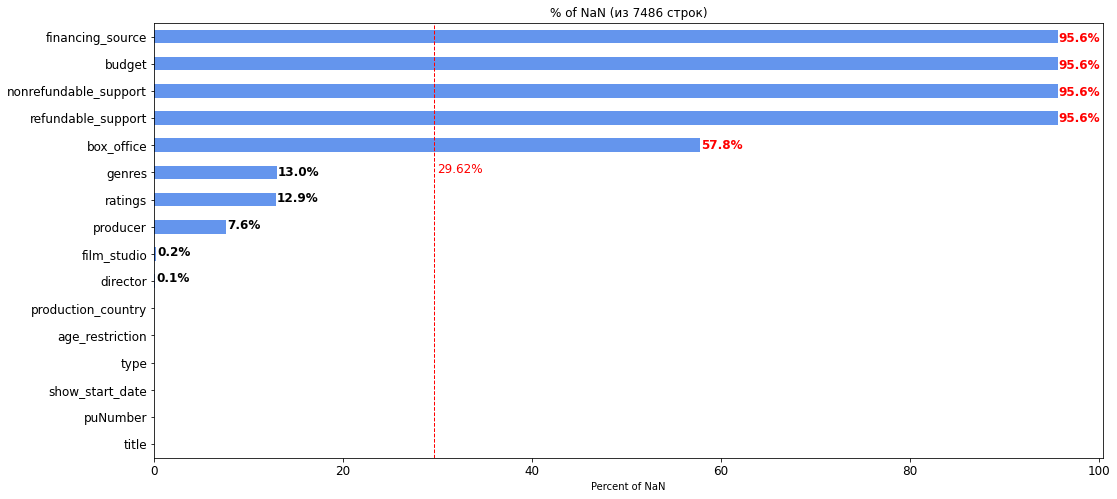

In [18]:
def percent_hbar(df, old_threshold=None):
    percent_of_nulls = (df.isnull().sum()/len(df)*100).sort_values().round(1)
    # ^^ Cчитаем процент для каждого столбца
    threshold = percent_of_nulls.mean()
    #^^ Выставляем порог по котору будем ориентироваться, при обработке пропусков
    ax = percent_of_nulls.plot(kind='barh', figsize=(17, 8), title='% of NaN (из 7486 строк)', 
                               color='CornflowerBlue', legend=False, fontsize=12)
    ax.set_xlabel('Percent of NaN')
    dict_percent = dict(percent_of_nulls)
    i = 0
    for k in dict_percent:
        color = 'black'
        if dict_percent[k] > 0: # разделям цветами те значения, которые ниже среднего значения
            if dict_percent[k] > threshold:
                color = 'red'
            ax.text(dict_percent[k]+0.1, i+0.09, str(dict_percent[k])+'%', color=color, 
                    fontweight='bold', fontsize='large')
        i+= 0.98 # Выставляем проценты 
    if old_threshold is not None:
        plt.axvline(x=old_threshold,linewidth=1, color='r', linestyle='--')
        ax.text(old_threshold+0.3, 10, '{0:.2%}'.format(old_threshold/100), color='r', fontsize='large')
        plt.axvline(x=threshold,linewidth=1, color='green', linestyle='--')
        ax.text(threshold+0.3, 10, '{0:.2%}'.format(threshold/100), color='green',fontsize='large')
    else:
        plt.axvline(x=threshold,linewidth=1, color='r', linestyle='--')
        ax.text(threshold+0.3, 10, '{0:.2%}'.format(threshold/100), color='r', fontsize='large')
    return ax,threshold

plot, threshold = percent_hbar(df)

* **refundable_support,nonrefundable_support,financing_source** — В данных столбцах одинаковое количество пропусков, скорее всего это связано с тем что практика финансирования фильмов из бюджета различных государственных организаций, таких как: Фонд Кино или Министерство культуры, распростронена только в России и странах СНГ, проверим эту гиппотезу и если она будет верна заполним пропуски в refundable_support,nonrefundable_support нулями,а в  financing_source Отсутствует;
* **budget** — Странно, что такое чудовищное количество пропусков в данном столбце, так как бюджет у каждого фильма свой, придется оставить данные как есть. Скорее всего тут та же проблема как и в предыдущем случае, база была выгружена с сайта в котором в основном информация о фильмах из России и стран СНГ, проверим эту гиппотезу и в будущем запросим у коллег новую выборку;
* **box_office** - Пропусков уже меньше, однако все равно превышает среднее значение. Проблема скорее всего та же, тем более в данном столбце указаны о сборах в рублях, может быть некоторые фильмы где в данном столбце пропуски вообще не показывались в России
* **film_studio, production_country, director, producer,genres** - для этих столбцов дабы не потерять нужную нам информацию при анализе, заполним пропуски значением unknown

Проверим гиппотезу о связи пропусков в столбцах **refundable_support,nonrefundable_support,financing_source:**

In [19]:
print('Количество пропусков  в refundable_support:',df['refundable_support'].isnull().sum())
print('Количество пропусков  в nonrefundable_support:',df['nonrefundable_support'].isnull().sum())
print('Количество пропусков  в financing_source:',df['financing_source'].isnull().sum())

Количество пропусков  в refundable_support: 7152
Количество пропусков  в nonrefundable_support: 7152
Количество пропусков  в financing_source: 7152


In [20]:
print('Количество пропусков попарно:',df.query('refundable_support != refundable_support and nonrefundable_support != nonrefundable_support and financing_source != financing_source').shape[0])

Количество пропусков попарно: 7152


In [21]:
df.query('production_country != "Россия"and refundable_support != refundable_support and nonrefundable_support != nonrefundable_support and financing_source != financing_source')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7480,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.40,"боевик,триллер",NaN
7481,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
print( 'Количество пропусков,если кино снималось в России:',df.query('production_country == "Россия"and refundable_support != refundable_support and nonrefundable_support != nonrefundable_support and financing_source != financing_source').shape[0])
print( 'Количество пропусков,если кино снималось не в России:',df.query('production_country != "Россия"and refundable_support != refundable_support and nonrefundable_support != nonrefundable_support and financing_source != financing_source').shape[0])

Количество пропусков,если кино снималось в России: 1503
Количество пропусков,если кино снималось не в России: 5649


Как мы видим основная часть фильмов по которой нет информации о гос. поддержке снимались не в России.А так как в нашей таблице содержится информация только о поддержке от Минкультуры и Фонда кино заполним эти пропуски следующим образом:

In [23]:
df['refundable_support'] = df['refundable_support'].fillna(0)
df['nonrefundable_support'] = df['nonrefundable_support'].fillna(0)
df['financing_source'] = df['financing_source'].fillna('Отсутствует')

Проверим избавились ли мы от всех пропусков:

In [24]:
print('Количество пропусков  в refundable_support:',df['refundable_support'].isnull().sum())
print('Количество пропусков  в nonrefundable_support:',df['nonrefundable_support'].isnull().sum())
print('Количество пропусков  в financing_source:',df['financing_source'].isnull().sum())

Количество пропусков  в refundable_support: 0
Количество пропусков  в nonrefundable_support: 0
Количество пропусков  в financing_source: 0


In [25]:
print('Количество пропусков  в film_studio:',df['film_studio'].isnull().sum())
print('Количество пропусков  в production_country:',df['production_country'].isnull().sum())
print('Количество пропусков  в director:',df['director'].isnull().sum())
print('Количество пропусков  в producer:',df['producer'].isnull().sum())
print('Количество пропусков  в genres:',df['genres'].isnull().sum())

Количество пропусков  в film_studio: 18
Количество пропусков  в production_country: 2
Количество пропусков  в director: 9
Количество пропусков  в producer: 567
Количество пропусков  в genres: 974


In [26]:
list_to_uknown = ['film_studio', 'production_country', 'director', 'producer', 'genres']
for column in list_to_uknown:
    df[column] = df[column].fillna('unknown')

In [27]:
print('Количество пропусков  в film_studio:',df['film_studio'].isnull().sum())
print('Количество пропусков  в production_country:',df['production_country'].isnull().sum())
print('Количество пропусков  в director:',df['director'].isnull().sum())
print('Количество пропусков  в producer:',df['producer'].isnull().sum())
print('Количество пропусков  в genres:',df['genres'].isnull().sum())

Количество пропусков  в film_studio: 0
Количество пропусков  в production_country: 0
Количество пропусков  в director: 0
Количество пропусков  в producer: 0
Количество пропусков  в genres: 0


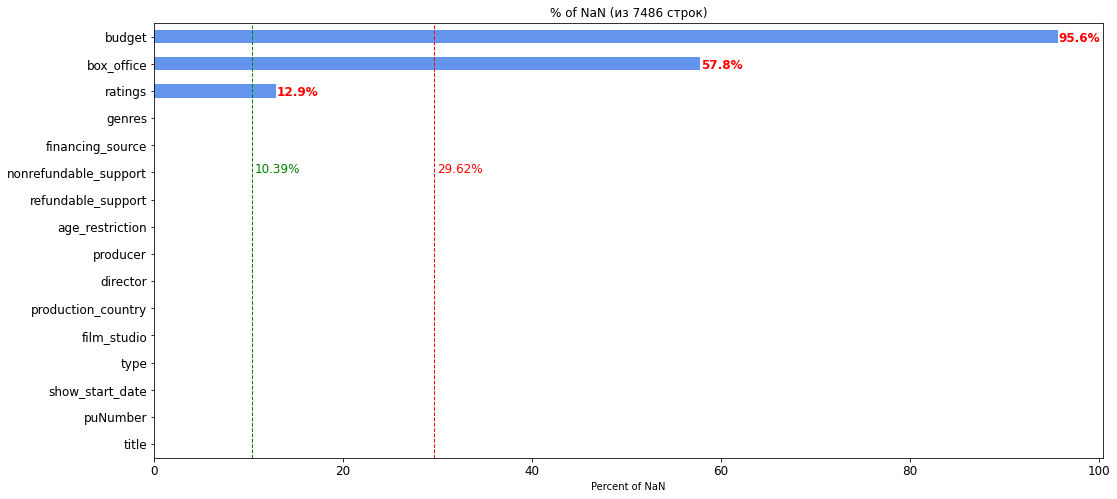

In [28]:
percent_hbar(df, threshold)
plt.show()

**Вывод**

Несмотря на то что мы снизили среднее количество пропусков до 10%, все равно в столбцах **budget**(95% пропусков) и **box_office**(57% пропусков), что является существенными показателями. Эти пропуски можно было бы заполнить если бы у нас была база данных сайта Кинопоиска.

**Удаление явных и не явных дубликатов**<a id='2.3'></a>

([к содержанию](#intro))

In [29]:
print('Количество дубликатов в столбце title:',df['title'].duplicated().sum())
print('Количество дубликатов в столбце puNumber:',df['puNumber'].duplicated().sum())

Количество дубликатов в столбце title: 714
Количество дубликатов в столбце puNumber: 2


In [30]:
 df[df.duplicated(['title'])]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,Отсутствует,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,Отсутствует,6.80,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Отсутствует,6.40,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Отсутствует,7.70,"фэнтези,приключения,семейный","759,526.00"
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,0.00,0.00,NaN,Отсутствует,8.20,"фэнтези,приключения,семейный","1,125,302.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7367,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Отсутствует,7.50,"триллер,детектив,криминал",NaN
7414,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,0.00,0.00,NaN,Отсутствует,7.90,"комедия,приключения,детектив",NaN
7436,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,0.00,0.00,NaN,Отсутствует,6.50,"триллер,драма","175,003.51"
7448,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,0.00,0.00,NaN,Отсутствует,6.80,"триллер,криминал,детектив",NaN


Как мы видим у нас достаточно много повторений по title и достаточно мало по puNumber. Cкорее всего такое количество дубликатов в данном столбце вызвано тем, что тем или иным кинотеатрам выдавали разные лицензии на показ одного и того же фильма, так как нас интересует именно анализ фильмов избавимся от дубликатов в этом столбце

In [31]:
df.drop_duplicates(subset =['title'], keep ='first', inplace = True)

In [32]:
print('Количество дубликатов в столбце title:',df['title'].duplicated().sum())
print('Количество дубликатов в столбце puNumber:',df['puNumber'].duplicated().sum())

Количество дубликатов в столбце title: 0
Количество дубликатов в столбце puNumber: 0


**Обработка категориальных значений**<a id='2.4'></a>


([к содержанию](#intro))

**Обработка type**

In [33]:
df['type'].value_counts()

Художественный                3928
 Художественный               1350
Анимационный                   766
Прочие                         390
Документальный                 282
Научно-популярный               52
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

Тут дубликаты обусловлены неправильной записью, исправим это 

In [34]:
df['type'] = df['type'].str.strip()

In [35]:
df['type'].value_counts()

Художественный                5278
Анимационный                   767
Прочие                         390
Документальный                 282
Научно-популярный               52
Музыкально-развлекательный       1
Name: type, dtype: int64

**Обработка production_country**

In [36]:
df['production_country'].value_counts()

Россия                                      1792
США                                         1775
СССР                                         345
Франция                                      278
Великобритания                               240
                                            ... 
Россия, Украина                                1
Франция - Монако                               1
США - Новая Зеландия - Япония                  1
США - Франция - Испания - Великобритания       1
Великобритания, Швеция, США                    1
Name: production_country, Length: 944, dtype: int64

In [37]:
df['production_country'] = df['production_country'].str.strip()
df['production_country'] = df['production_country'].apply(lambda a: str(a).replace('-',''))
df['production_country'] = df['production_country'].apply(lambda a: str(a).replace(' ',','))
df['production_country'] = df['production_country'].apply(lambda a: str(a).replace(',,',','))

В данном столбце, что и в столбце **genres** имеются существенные проблемы. Неправильная запись повлекла за собой появление кучи неявных дубликатов.Поменяли все знаки препинания на ",", что позволило сократить количество неявных дубликатов, но в целом не сильно изменило картину. Так как для дальнейшего анализа эти данные не пригодятся оставим как есть.

**Обработка age_restriction**

In [38]:
df['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2512
«12+» - для детей старше 12 лет           1479
«18+» - запрещено для детей               1427
«0+» - для любой зрительской аудитории     749
«6+» - для детей старше 6 лет              603
Name: age_restriction, dtype: int64

В данном столбце все отлично все представленные значения уникальны и не содержат неявных дубликатов.

**Обработка genres**

In [39]:
df['genres'].value_counts()

unknown                          965
драма                            448
комедия                          329
мелодрама,комедия                181
драма,мелодрама                  170
                                ... 
документальный,драма,комедия       1
для взрослых,драма,мелодрама       1
криминал,детектив,приключения      1
фантастика,боевик,ужасы            1
драма,военный,приключения          1
Name: genres, Length: 743, dtype: int64

Здесь в отличие от столбца **production_country** предлагаю выделить первый тип жанра в отдельную колонку, для удобства дальнейшего анализа данных.

**Обработка financing_source:**

In [40]:
df['financing_source'].value_counts()

Отсутствует                         6441
Министерство культуры                163
Фонд кино                            144
Министерство культуры, Фонд кино      22
Name: financing_source, dtype: int64

Здесь все в порядке оставим как есть

**Вывод:**

* **type** данные были выгружены с ошибками в виде пробелов в начале ячейки, исправили
* **production_country** снизили количества неявных дубликатов, но остальную часть оставили как есть, так как эти данные не потребуются при дальнейшем анализе
* **age_restriction** данные в порядке
* **ratings** в данных была разная запись рейтинга в десятичном формате и в формате %, заменили все на десятичный формат, еще в предыдущем параграфе
* **genres** В данных та же проблема что и в столбце production_country. Из этих данных выделим первый жанр из ряда как главный в отдельный столбец
* **financing_source** данные в порядке 

К тому же общей проблемой для всех остальных столбцов можно выделить огромное количество уникальных значений из-за того, что во всех этих полях идет перечисление


**Обработка количественныех значения**<a id='2.5'></a>


([к содержанию](#intro))

In [41]:
df['refundable_support'].value_counts()

0.00              6661
20,000,000.00       12
10,000,000.00       10
25,000,000.00       10
15,000,000.00        9
50,000,000.00        8
40,000,000.00        8
5,000,000.00         8
30,000,000.00        7
60,000,000.00        6
100,000,000.00       4
110,000,000.00       2
55,000,000.00        2
19,000,000.00        2
75,000,000.00        2
7,153,119.00         1
35,000,000.00        1
9,000,000.00         1
150,000,000.00       1
36,000,000.00        1
29,000,000.00        1
17,000,000.00        1
180,000,000.00       1
115,000,000.00       1
41,000,000.00        1
26,000,000.00        1
7,000,000.00         1
7,346,881.00         1
3,500,000.00         1
8,000,000.00         1
38,000,000.00        1
44,000,000.00        1
28,000,000.00        1
80,000,000.00        1
Name: refundable_support, dtype: int64

In [42]:
df['nonrefundable_support'].value_counts()

0.00              6450
25,000,000.00       53
30,000,000.00       47
35,000,000.00       29
40,000,000.00       26
                  ... 
31,000,000.00        1
29,000,000.00        1
138,969,465.00       1
3,000,000.00         1
25,900,000.00        1
Name: nonrefundable_support, Length: 75, dtype: int64

In [43]:
df['budget'].value_counts()

0.00              17
38,000,000.00      6
80,000,000.00      4
50,000,000.00      4
37,142,857.00      3
                  ..
49,280,496.00      1
56,693,559.00      1
57,166,797.00      1
109,814,241.00     1
42,252,509.00      1
Name: budget, Length: 287, dtype: int64

По логике вещей значение в столбце budget не может превышать значения в nonrefundable_support и refundable_support проверим данные на такие значения.

In [44]:
df.query('budget < nonrefundable_support or budget < refundable_support')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2051,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2056,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2470,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2530,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2613,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2682,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2786,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2872,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3045,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3563,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


In [45]:
percentage_of_support = (df['refundable_support'] + df['nonrefundable_support']) / df['budget'] * 100
print('Средняя доля гос.поддержки в бюджете фильмов',percentage_of_support.median().round(0),'%')

Средняя доля гос.поддержки в бюджете фильмов 62.0 %


In [46]:
df.loc[df['budget'] == 0, 'budget'] = (df.loc[df['budget'] == 0,'refundable_support'] + df.loc[df['budget'] == 0,'nonrefundable_support']) / percentage_of_support.median() 

**Добавление новых столбцов**<a id='2.6'></a>


([к содержанию](#intro))





**Создание столбца: year_of_rental**

Создадим столбец  с годом выхода фильма для анализа ежегодной динамики

In [47]:
df['year_of_rental'] = df['show_start_date'].dt.year

**Создание столбцов:  main_director, main_genre**

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6770 entries, 0 to 7483
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  6770 non-null   object             
 1   puNumber               6770 non-null   int64              
 2   show_start_date        6770 non-null   datetime64[ns, UTC]
 3   type                   6770 non-null   object             
 4   film_studio            6770 non-null   object             
 5   production_country     6770 non-null   object             
 6   director               6770 non-null   object             
 7   producer               6770 non-null   object             
 8   age_restriction        6770 non-null   object             
 9   refundable_support     6770 non-null   float64            
 10  nonrefundable_support  6770 non-null   float64            
 11  budget                 329 non-null    float64          

In [49]:
def add_main(df, columns):
    for column in columns:
        df[f'main_{column}'] = df[column].dropna().apply(lambda x: x.split(',')[0])
    return df

In [50]:
df = add_main(df, ['director', 'genres'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6770 entries, 0 to 7483
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  6770 non-null   object             
 1   puNumber               6770 non-null   int64              
 2   show_start_date        6770 non-null   datetime64[ns, UTC]
 3   type                   6770 non-null   object             
 4   film_studio            6770 non-null   object             
 5   production_country     6770 non-null   object             
 6   director               6770 non-null   object             
 7   producer               6770 non-null   object             
 8   age_restriction        6770 non-null   object             
 9   refundable_support     6770 non-null   float64            
 10  nonrefundable_support  6770 non-null   float64            
 11  budget                 329 non-null    float64          

**Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.**<a id='2.7'></a>


([к содержанию](#intro))

Так как мы сделали это раньше построим график зависимости поддержки от бюджета

Среднее значение доли государственной поддержки в общем бюджете составляет: 62.0 %


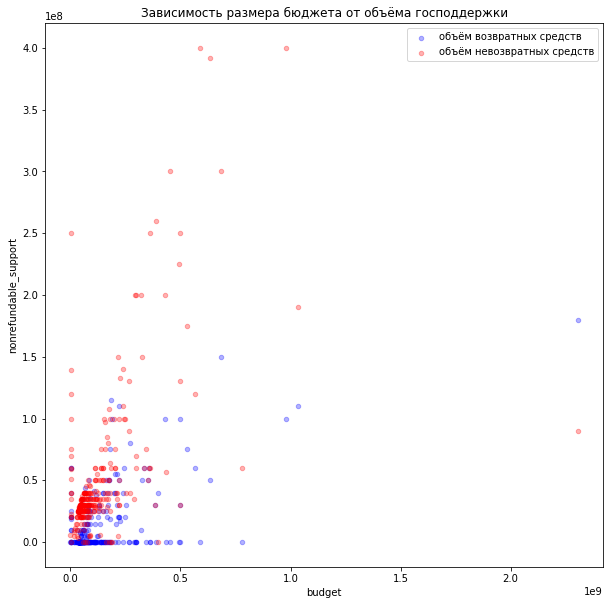

In [51]:

ax = df.plot.scatter(
    title='Зависимость размера бюджета от объёма господдержки',
    label='объём возвратных средств',
    x='budget',
    y='refundable_support',
    color='blue',
    alpha=0.3
)

df.plot.scatter(
    label='объём невозвратных средств',
    x='budget', y='nonrefundable_support',
    color='red',
    alpha=0.3,
    figsize =(10,10),
    ax=ax)
print('Среднее значение доли государственной поддержки в общем бюджете составляет:',percentage_of_support.median().round(0),'%')

# 3. Исследовательский анализ данных<a id='3'></a>


Проанализируем какое количество фильмов выходило каждый год и посмотрим динамику изменения сборов.

**График ежегодной динамики выпуска фильмов:**<a id='3.1'></a>


([к содержанию](#intro))

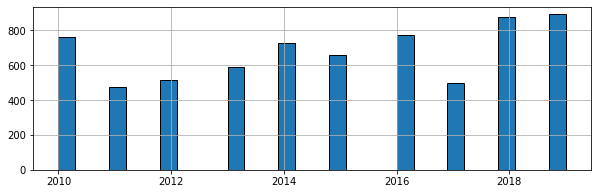

In [52]:
df['year_of_rental'].hist(bins=30,figsize=(10,3), ec='black', grid = True)
plt.show()

In [53]:
df['year_of_rental'].value_counts().sort_values()

2011    477
2017    498
2012    516
2013    590
2015    661
2014    729
2010    762
2016    771
2018    875
2019    891
Name: year_of_rental, dtype: int64

**Вывод:**

Как мы видим в 2010 году было выпущено более 700 фильмов после этого был спад до 2014 года. После этого был лишь спад в 2017 году, а далее динамика росла. До 2019 года через каждый после пика был спад возможно это связано с финансированием кино, так есть определенный бюджет закладывают на определенный период времени, возможно это срок 2 года, чем могут обуславливаться такие "провалы".

**Графики динамики суммы сборов**<a id='3.2'></a>


([к содержанию](#intro))

Теперь рассмотрим как менялась динамика проката по годам, так же выясним в каком году сумма сборов была минимальной и максимальной

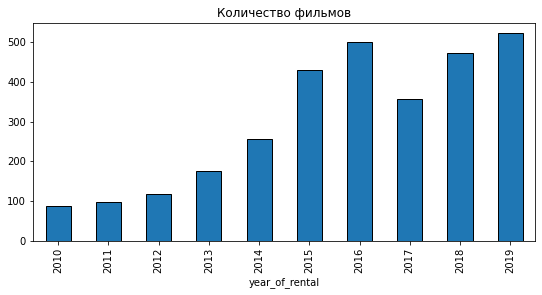

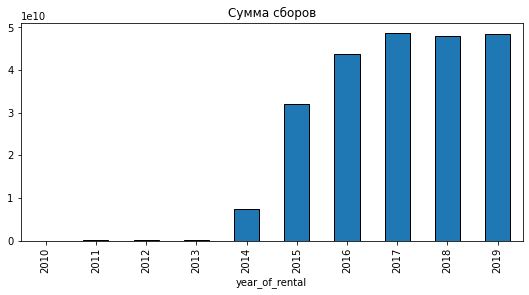

Минимальная сумма сборов| 2374340.0 руб. |2010 год
Максимальная сумма сборов| 48561554267.0 руб. |2017 год


In [54]:
year_box_office_pivot = df.loc[df['box_office'].notna(), ['year_of_rental', 'box_office']].groupby('year_of_rental').agg(['count', 'sum', 'mean', 'median'])

year_box_office_pivot.columns = year_box_office_pivot.columns.get_level_values(1)


plot = year_box_office_pivot.plot(y="count", kind='bar', ec='black', 
                            title='Количество фильмов', legend=None, 
                            figsize=(9,4))
plt.show()
plot = year_box_office_pivot.plot(y="sum", kind='bar', ec='black', 
                            title='Сумма сборов', legend=None, 
                            figsize=(9,4))
plt.show()
print('Минимальная сумма сборов|',year_box_office_pivot['sum'].min().round(0),'руб.','|2010 год')
print('Максимальная сумма сборов|',year_box_office_pivot['sum'].max().round(0),'руб.', '|2017 год')

**Вывод:**

Несмотря на то что в предыдущем графике мы видим, что в 2010 году было премьер намного больше чем указано на этом графике. Скорее всего это связано с тем, что с 2010-2013 года не собиралась информация о сборах фильмов. 
Как мы видим по информации, которая у нас имеется с 2010 года по 2019 каждый год увеличиволось количество фильмов ( с информацией о сборах) и логично, что и росли суммы сборов. Самые низкие сборы были в 2010 году и составили 2 374 340 руб. а в пиковом значение в 2017 году сумма сборов составила 48 561 554 267 руб.
Как и было сказано такие сумашедшие разрывы в цифрах могут быть связаны с недостатком информации и неправильной выгрузке данных, так как разница между 2016 годом и 2019 была не существена.

**Графифки средней и медианной  суммы сборов для каждого года**<a id='3.3'></a>


([к содержанию](#intro))

Так как информации с 2010 года по 2014 год недостаточно для анализа данных, построим график с 2015 по 2019:

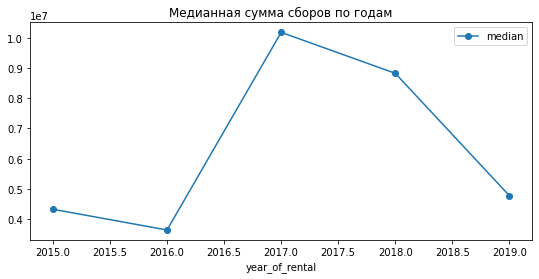

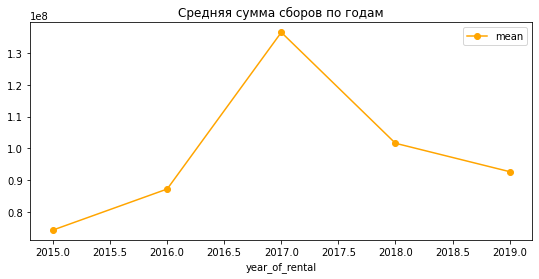

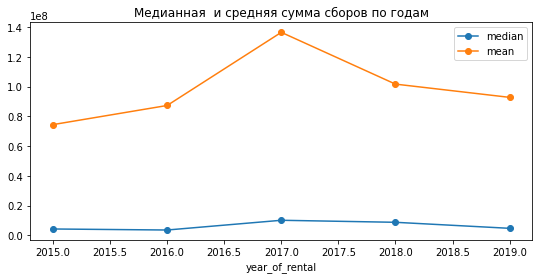

In [55]:

plot = year_box_office_pivot.query('count > 257').plot(kind='line', style ='o-', y = 'median',
                            title='Медианная сумма сборов по годам', 
                            figsize=(9,4), )

plt.show()
plot = year_box_office_pivot.query('count > 257').plot(kind='line', style ='o-', y = 'mean',color = 'orange',
                            title='Средняя сумма сборов по годам', 
                            figsize=(9,4), )

plt.show()

plot = year_box_office_pivot.query('count > 257').plot(kind='line', style ='o-', y = ['median','mean'],
                            title='Медианная  и средняя сумма сборов по годам', 
                            figsize=(9,4), )

Картина достаточно ясна, так как уровень сборов с 2015 года по 2019 были плюс минус на одном уровне график довольно плавный, но есть пик в 2017 году связанный с тем что в этом году был самый прибильный год.

**Графики, влияния возрастного ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате**<a id='3.4'></a>


([к содержанию](#intro))

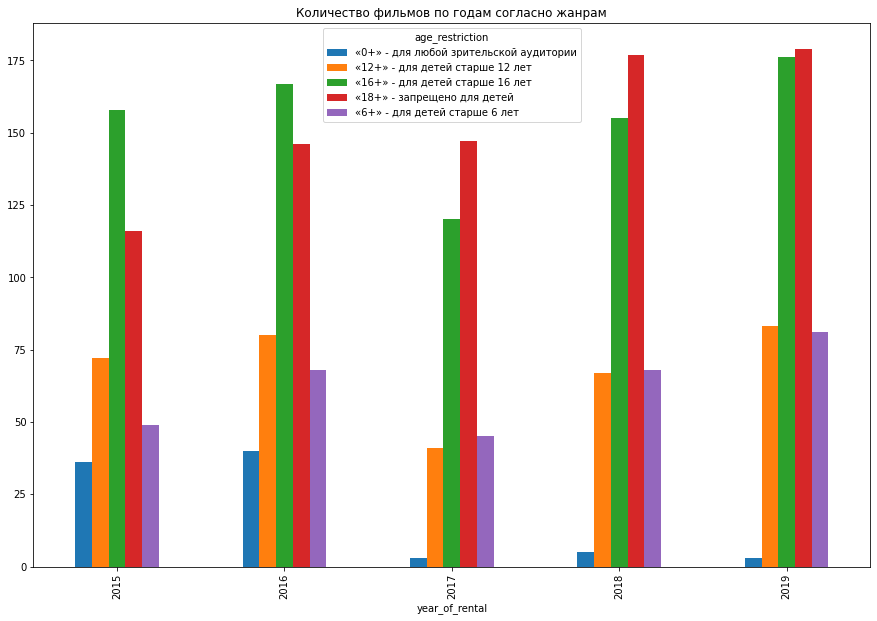

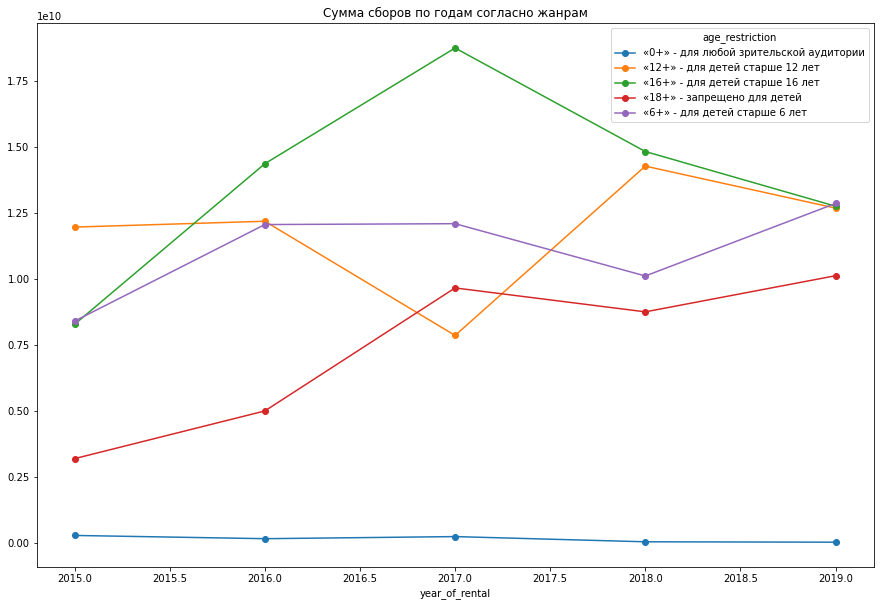

In [56]:
age_restriction_pivot = df.loc[df['box_office'].notna()].pivot_table(index = 'year_of_rental', columns = 'age_restriction',
                                                                     values = 'box_office', aggfunc= ('sum','count'))
plot = age_restriction_pivot.query('year_of_rental >= 2015').plot(kind='bar',
                            title='Количество фильмов по годам согласно жанрам', 
                            figsize=(15,10), y = 'count')

plot = age_restriction_pivot.query('year_of_rental >= 2015').plot(kind='line', style ='o-',
                            title='Сумма сборов по годам согласно жанрам', 
                            figsize=(15,10), y = 'sum')
plt.show()

* **"0+" для любой зрительской аудитории** - всего за этот период было снято 87 фильмов в этой возрастной категории. Самый малочисленный по количеству фильмов и сборам. Странно, что этот сумма сборов по этой возрастной категории настолько низка скорее всего это связано с тем что в нашей базе всего лишь 87 фильмов и анализ такого количества данных не может быть релевантным


* **"6+" для детей старше 6 лет** -  всего за этот период было снято 311 фильмов в этой возрастной категории.в 2019 году сборы с этой возрастной категории заняли 1-3 место не смотря на то что по количеству фильмов эта возрастная категория занимает предпосленее место. С 2015 года сборы фильмов в данной возрастной категории росли и в 2019 году спокойно конкурировали с другими возрастными категориями.


* **"12+" для детей старше 12 лет** -  всего за этот период было снято 343 в этой возрастной категории. в 2019 году сборы с этой возрастной категории заняли 1-3 место. В 2017 году сборы по этому возрастному жанру резко просели связано это с тем, что количество фильмов вышло существнено меньше.


* **"16+" для детей старше 16 лет** - всего за этот период было снято 776 в этой возрастной категории. Самый популярный жанр однако также занимающий 1-3 место по количеству сборов


* **"18" запрещено для детей** -  всего за этот период было снято 765 фильмов в этой возрастной категории. Не смотря на то что количество данных фильмов занимает второе место,сумма сборов занимает скромное 4 место. Связано это скорее всего с тем что аудитория свыше 18 лет на порядок ниже чем аудитория фильмов до 18 лет.

# 4. Исследовательский анализ данных фильмов с государственной поддержкой <a id='4'></a>


**Создание датафрейма**<a id='4.1'></a>


([к содержанию](#intro))

Для начала создадим новый датафрейм куда включим только те фильмы, которые получили гос. поддержку, а также добавим туда следующие столбцы:
* **full_support** - сумма всей государственной поддержки
* **payback** - процент окупаемости фильма
* **is_paid_off,isnot_paid_off** - информация окупился или не окупился фильм

In [57]:
df_supported = df[df['refundable_support'].notna() | df['nonrefundable_support'].notna()]
df_supported = df_supported.query('refundable_support != 0.0 and nonrefundable_support != 0.0')


df_supported['full_support'] = df_supported['refundable_support'] + df_supported['nonrefundable_support']
df_supported['payback'] = df['box_office'] / (df_supported['full_support'] +df_supported['budget']) - 1
df_supported['is_paid_off'] = df_supported['payback'] > 0
df_supported['isnot_paid_off'] = df_supported['payback'] < 0
df_supported['is_paid_off'] = df_supported['is_paid_off'].astype(int)
df_supported['isnot_paid_off'] = df_supported['isnot_paid_off'].astype(int)
df_supported['percent'] = (df_supported['full_support'] / df_supported['budget']) * 100

**Диаграмма окупаемости фильмов с гос.поддержкой**<a id='4.2'></a>


([к содержанию](#intro))

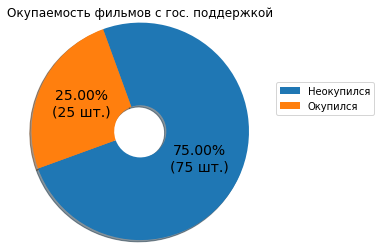

In [58]:
is_paid_off = df_supported.pivot_table(index='is_paid_off', values='puNumber', aggfunc='count')
def func_pct(pct, data, sum_of_all):
    value = float(pct/100.*sum_of_all)
    return "{:.2f}%\n({:.0f} шт.)".format(pct, value)
    
data_for_pct = is_paid_off
sum_is_paid_off = is_paid_off.sum()
ax= is_paid_off.plot(kind='pie', y="puNumber", radius=1.25, shadow=True, startangle=200, fontsize=14,
                                                            autopct = lambda pct: func_pct(pct,data_for_pct,sum_is_paid_off),
                                                            legend=True, labels=None,wedgeprops=dict(width=0.95))
ax.set_ylabel('')
ax.legend(['Неокупился', 'Окупился'], 
                      bbox_to_anchor=(1.1,0.75), prop={'size':10})
ax.set_title("Окупаемость фильмов с гос. поддержкой")
plt.show()

**Вывод:**

Как мы видим поддержка Российского кинематографа дело достаточно убыточное из 100 фильмов окупилось лишь 25 % . Возможно это связано с тем, что стоит задуматься о пересмотре процедуры выдачи гос.поддержки некоторым фильмам, и взять за основу удачные экземпляры

**График самых популярных жанров получивших гос.поддержку**<a id='4.3'></a>


([к содержанию](#intro))

Теперь рассмотрим какие именно жанры чаще всего получали гос. поддержку. Для этого сначала создадим функцию, которая отделит фильмы снятые с участием России от фильмов без нее, для  понимания соотношения поддержки выдаваемой тем или иным жанрам:

In [59]:
def categorize_country(row):
        if 'Росс' in row:
            return 'Россия'

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6770 entries, 0 to 7483
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  6770 non-null   object             
 1   puNumber               6770 non-null   int64              
 2   show_start_date        6770 non-null   datetime64[ns, UTC]
 3   type                   6770 non-null   object             
 4   film_studio            6770 non-null   object             
 5   production_country     6770 non-null   object             
 6   director               6770 non-null   object             
 7   producer               6770 non-null   object             
 8   age_restriction        6770 non-null   object             
 9   refundable_support     6770 non-null   float64            
 10  nonrefundable_support  6770 non-null   float64            
 11  budget                 329 non-null    float64          

In [61]:
df['main_country'] = df['production_country'].apply(categorize_country)

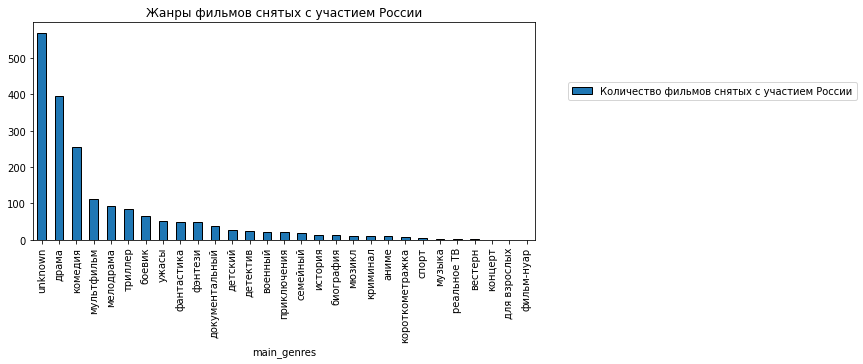

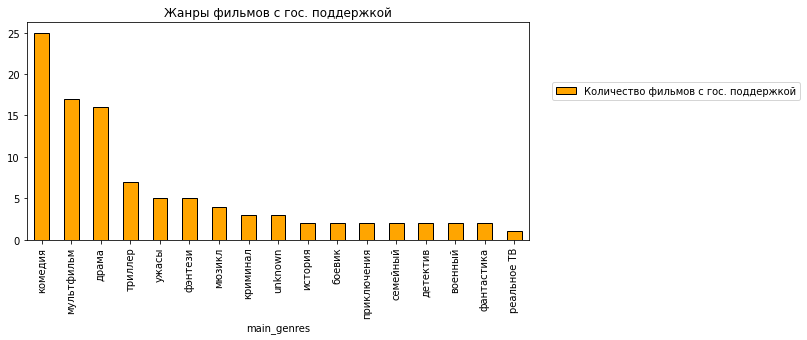

In [62]:
genres_coun = df.pivot_table (index = 'main_genres', values = 'main_country', aggfunc='count')
ax = genres_coun.sort_values(by = 'main_country' , ascending=False).plot(kind='bar', ec='black', 
                            title='Жанры фильмов снятых с участием России', legend = None,
                            figsize=(9,4))
ax.set_ylabel('')
ax.legend(['Количество фильмов снятых с участием России'], 
                      bbox_to_anchor=(1.65,0.75), prop={'size':10})
plt.show()

main_genres_count = df_supported.pivot_table(index='main_genres', values='is_paid_off', aggfunc=('count','sum'))
main_genres_count['percent'] = main_genres_count['sum'] / (main_genres_count['count'] / 100)
ax = main_genres_count.sort_values(by = 'count' , ascending=False).plot(kind='bar', ec='black', 
                            title='Жанры фильмов с гос. поддержкой', legend=None, 
                            figsize=(9,4),y ='count', color = 'orange')
ax.set_ylabel('')
ax.legend(['Количество фильмов с гос. поддержкой'], 
                      bbox_to_anchor=(1.55,0.75), prop={'size':10})
plt.show()

Как мы видим несмотря на то что самый популярный жанр в России является драма, он занимает лишь 3 место среди фильмов получивших государственную поддержку. Чаще всего гос. поддержку получает жанр комедия, скорее всего это связано с тем что на более позитивные картины Министерство культуры или Фонда кино чаще выделяют деньги. Количество фильмов среди гос.поддержки  в жанрах мультфильмов и драм примерно одинаковые. Теперь рассмотрим, как часто окупаются те или иные жанры в Российском кино и насколько рацианально выделение бюджетных средств на те или иные жанры.

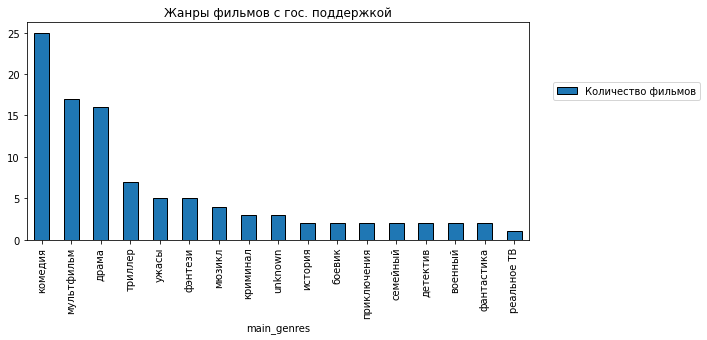

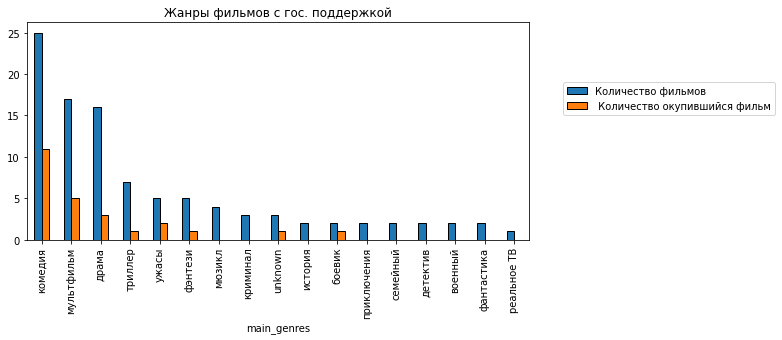

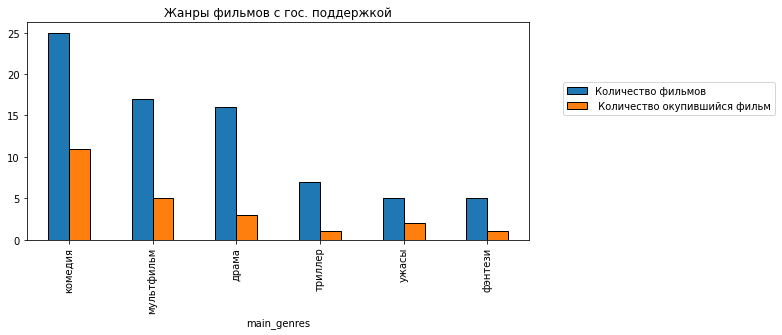

,count,sum,percent
main_genres,,,
комедия,25,11,44.00
ужасы,5,2,40.00
мультфильм,17,5,29.41
фэнтези,5,1,20.00
драма,16,3,18.75
триллер,7,1,14.29


In [63]:

main_genres_count = df_supported.pivot_table(index='main_genres', values='is_paid_off', aggfunc=('count','sum'))
main_genres_count['percent'] = main_genres_count['sum'] / (main_genres_count['count'] / 100)
ax = main_genres_count.sort_values(by = 'count' , ascending=False).plot(kind='bar', ec='black', 
                            title='Жанры фильмов с гос. поддержкой', legend=None, 
                            figsize=(9,4),y ='count')
ax.set_ylabel('')
ax.legend(['Количество фильмов'], 
                      bbox_to_anchor=(1.35,0.75), prop={'size':10})
plt.show()


ax = main_genres_count.sort_values(by = 'count' , ascending=False).plot(kind='bar', ec='black', 
                            title='Жанры фильмов с гос. поддержкой',
                            figsize=(9,4),y =['count','sum'])
ax.set_ylabel('')
ax.legend(['Количество фильмов', ' Количество окупившийся фильм'], 
                      bbox_to_anchor=(1.5,0.75), prop={'size':10})
plt.show()
ax = main_genres_count.query('count >= 5').sort_values(by = 'count' , ascending=False).plot(kind='bar', ec='black', 
                            title='Жанры фильмов с гос. поддержкой',
                            figsize=(9,4),y =['count','sum'])
ax.set_ylabel('')
ax.legend(['Количество фильмов', ' Количество окупившийся фильм'], 
                      bbox_to_anchor=(1.5,0.75), prop={'size':10})
plt.show()

main_genres_count.query('count >= 5').sort_values(by = 'percent' , ascending=False)

**Вывод:**

Как мы видим самым популярным жанром является комедия, в этом жанре сняли ровно 25 % от общего числа фильмов с государственной поддержкой.
Однако окупаемость фильмов оставляет желать лучшего. Самым лучшем жанром по окупаемости стал боевик 50 %, но в данном жанре было снято всего два фильма, поэтому для анализа мы отобрали топ 5 жанров в котором снято минимум 5 фильмов. Составим рейтинг по окупаемости среди этих фильмов.

* Комедия - этот жанр является самым популярным среди всех и 44% данных фильмов окупается в продаже, что является лучшим результатом среди всех
* Мультфильм - этот жанр занимамает второе место по количеству снятых картин, однако лишь 29 % окупается в продаже что является третим результатом среди самых популярных жанров
* Драма - этот жанр занимает первое место среди картин снятых с участием России, однако по количеству фильмов на которуе выделили гос. поддержку занимает лишь третье место со скромной окупаемостью 19 %

Самым окупаемым жанром среди тех кому выдают гос.поддержку является коммедия, может быть поэтому чаще всего деньги выделяют именно на этот жанр. Так как фильмы с жанром драма, которых снимают больше всего с участием России окупаются лишь в 19 %, что является довольно низким результатом из чего и вытекает такое маленькое количество фильмов в этом жанре, на которые выделили деньги.
Так же средняя окупаемость фильмов в пяти самых популярных составила 28 %, что является довольно низким результатом, однако выше среднего значения среди всех жанров на 3 %

**Средняя оценка фильмов с гос.поддержкой:**<a id='4.4'></a>


([к содержанию](#intro))

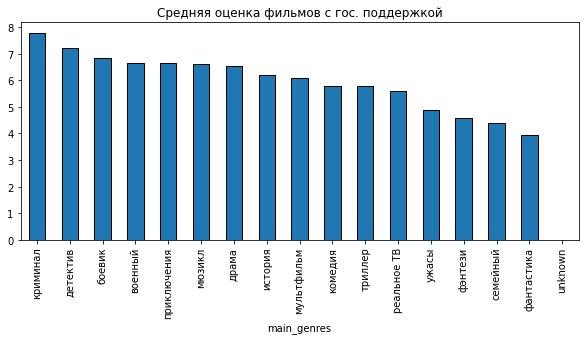

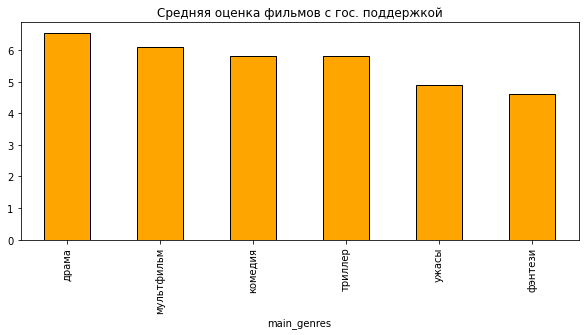

In [64]:
main_genres_rating = df_supported.pivot_table(index='main_genres', values='ratings', aggfunc=('median','count'))
plot = main_genres_rating.sort_values(by = 'median' , ascending=False).plot(kind='bar', ec='black', 
                            title='Средняя оценка фильмов с гос. поддержкой', legend=None, 
                            figsize=(10,4),y = 'median')
plt.show()

main_genres_rating = df_supported.pivot_table(index='main_genres', values='ratings', aggfunc=('median','count'))
plot = main_genres_rating.query('count >= 5').sort_values(by = 'median' , ascending=False).plot(kind='bar', ec='black', 
                            title='Средняя оценка фильмов с гос. поддержкой', legend=None, 
                            figsize=(10,4),y = 'median', color = 'orange')

**Вывод:**

Самый высокий средний рейтинг получили фильмы жанра криминал, однако таких фильмов было снято всего 3, поэтому отфильтруем датафрейм по жанрам в котором сняли более 5 фильмов. 
Так в среднем рейтинге среди всех жанров составляет всего 6 из 10,  и по графику видно что в все жанры получали примерно одни и те же оценки, так в самым высоким рейтинг пользователи в основном награждуют жанр драма (6.5 из 10), а самую низкую оценку заслужил жанр фэнтези с оценкой (4.6 из 10).

**График режиссеров чаще всего получавших гос.поддержку**<a id='4.5'></a>


([к содержанию](#intro))

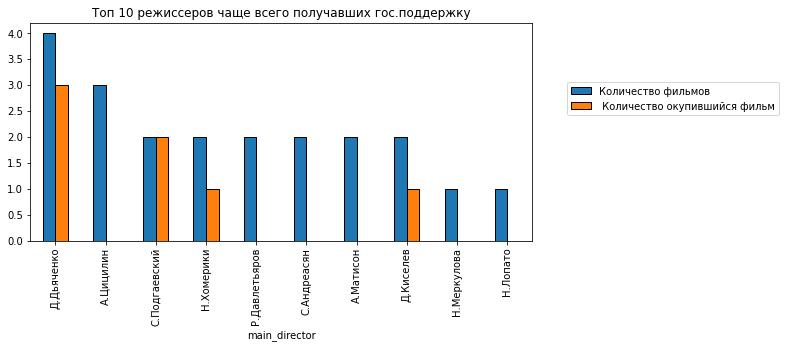

In [65]:
main_director_count = df_supported.pivot_table(index='main_director', values=('is_paid_off'), aggfunc=('count','sum'))
ax = main_director_count.sort_values(by = 'count',ascending=False).head(10).plot(kind='bar', ec='black', 
                            title='Топ 10 режиссеров чаще всего получавших гос.поддержку', 
                            legend=None,figsize=(9,4),y =['count','sum'])
ax.set_ylabel('')
ax.legend(['Количество фильмов', ' Количество окупившийся фильм'], 
                      bbox_to_anchor=(1.5,0.75), prop={'size':10})
plt.show()

**Вывод:**

Тут мы наблюдаем удручающую картину только 4 режиссера из 10 получавших чаще всего получавших гос. поддержку хоть раз окупали свое произведение. Самым успешным режиссером в данном случае является Д.Дьяченко, который также чаще всех остальных получал гос. поддержку, а именно 4 раза. Однако режиссер А. Цицилин получал гос. поддержку 3 раза и ни разу его картина не окупилась, что наталкивает на мысль, что некоторым режиссером не стоит давать гос. поддержку если нашей целью является окупаемость фильма.

**График доли государственной поддержки в бюджете фильма по жанрам**<a id='4.6'></a>


([к содержанию](#intro))

Сразу построим график из тех жанров, количество отснятых фильмов в которых более или равно 5:

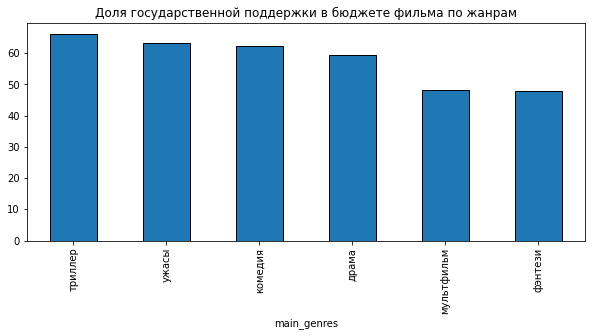

In [66]:
main_genres_percent = df_supported.pivot_table(index='main_genres', values='percent', aggfunc=('median','count'))
plot = main_genres_percent.query('count >= 5').sort_values(by = 'median' , ascending=False).plot(kind='bar', ec='black', 
                            title='Доля государственной поддержки в бюджете фильма по жанрам', legend=None, 
                            figsize=(10,4), y = 'median')

**Вывод:**

В среднем доля государсвтенной поддержки в бюджете фильма составляет 62 %, что является существенным результатом с тем учетом, что окупается лишь каждый 4 фильм. Самым проспонсированным жанром оказался триллер в среднем доля составялет 66 %.

**График окупаемости фильмов по возрастным ограничения**<a id='4.7'></a>


([к содержанию](#intro))

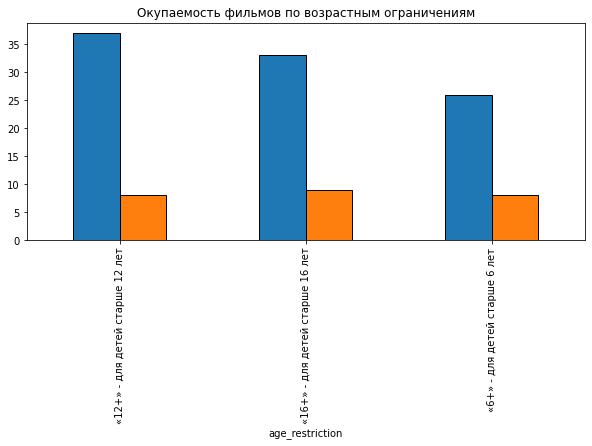

In [67]:
age_restriction_pivot = df_supported.pivot_table(index='age_restriction', values='is_paid_off', aggfunc=('sum','count'))
age_restriction_pivot['percent'] = age_restriction_pivot['sum'] / (age_restriction_pivot['count'] / 100)

plot = age_restriction_pivot.query('count >= 5').sort_values(by = 'count' , ascending=False).plot(kind='bar', ec='black', 
                            title='Окупаемость фильмов по возрастным ограничениям', legend=None, 
                            figsize=(10,4), y = ['count','sum'])

**Вывод:**

Возрастное ограничение фильмов не особо влияет на то окупился ли фильм или нет. Так в среднем процент окупаемости составляет 21 %

**График студий по окупаемости**<a id='4.8'></a>


([к содержанию](#intro))

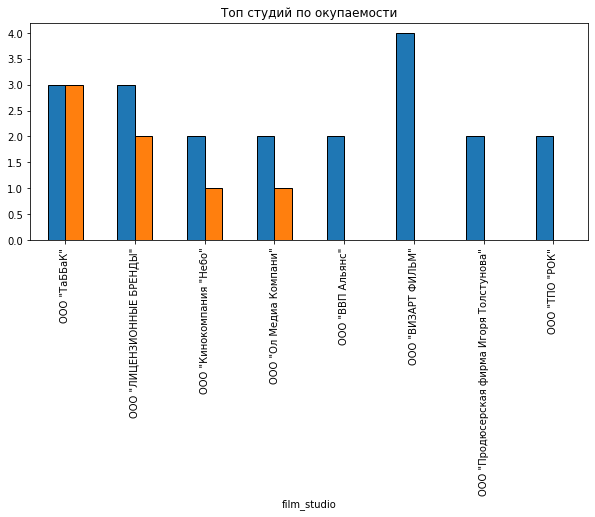

In [68]:
film_studio_pivot = df_supported.pivot_table(index='film_studio', values='is_paid_off', aggfunc=('sum','count'))
plot = film_studio_pivot.query('count >= 2').sort_values(by = 'sum' , ascending=False).plot(kind='bar', ec='black', 
                            title='Топ студий по окупаемости', legend=None, 
                            figsize=(10,4), y = ['count','sum'])

**Вывод:**

Самая успешная студия ООО"ТаББак" у которой окупились все 3 фильма, далее идет ООО"Лицензионные Бренды" у которых окупились два фильма. Хуже всего снимает студия ООО "Визарт Фильм", которая получила больше всего заказов, но не один из них не окупился

**Вывод к параграфу:**<a id='4.9'></a>


([к содержанию](#intro))

* Только 25 % фильмов получивших гос. поддержку окупились, что является довольно плохим результатом
* Самый популярный жанр комедия
* Стоит пересмотреть спонсирование фильмов, опираясь не только на жанры, но и на выбор режиссера, так как всего 4 из 10 самых популярных режиссеров хоть раз окупали своим фильмы.
* В среднем доля гос. поддержки в бюджете фильма составляет 62 %.
* Возрастные ограничения не сильно влияют на окупаемость фильма
* Выбор студии при спонсирование является важным фактором


Таким образом стоит пересмотреть стратегию выдачи гос. поддержки, так как нынешние показатели являются довольно слабыми. В целом предлагаю чаще обращать внимание на того режиссера, которому выдают гос. поддержку и так же жанр фильма.

# 5. Общий вывод<a id='5'></a>


([к содержанию](#intro))

Мы провели анализ данных о фильмах предоставленных Министерством культуры, а так же частью данных с сайта Кинопоиск. В исходных данных было достаточно много пропусков, в среднем 30 %, так же были столбцы где пропусков было свше 95%. Мы заполнили пропуски и снизили их количество до 10 %, но анализ был бы более релевантен, если бы мы получили дополнительные данные по пропущенным столбцам с сайта Кинопоиск. 


Кроме того из нашего датафрейма следует, что только фильмы с участием России получают гос. поддержку, что не очень корректно, так как в других странах фильмы тоже получают поддержку, а анализ их успешного опыта помог бы нам увеличить окупаемость нащих фильмов.


Так как нам требуется пересмотр выделения государственных денег на спонсирование фильмов, ведь всего 25 % фильмов получивших поддержку окупаются.
Для изменения ситуации требуется пересмотр жанра например зрители высоко оценили фильмы в жанре криминал, однако всего лишь два фильма были спонсированы. Кроме того стоит обратить внимание на режиссера, который снимает фильм, так как многие из них уже сняли более 2-ух фильмов, которые не окупились и продолжают получать гранты на производство фильма.  Также стоит снизить долю гос. поддержки в фильмах до 50 %

Идеальный фильм для спонсирования:
* Жанр: коммедия, криминал или драма
* Режиссер: Д.Дьяченко или С. Подгаевский
* Доля гос поддержки в бюджете: до 50 %.
* Возрастное ограничение: не особо влияет
* Студия: ООО "ТаББак" или ООО "Лицензионные Бренды